
# *Netflix Data: Cleaning, Analysis and Visualization*
---

## *1. Importing Libraries*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings('ignore')

## *2. Loading The Dataset*

In [3]:
df = pd.read_csv('netflix1.csv')

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.shape

(8790, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


## *3. Data Cleaning*
Identify and handle missing data, correct data types, and drop duplicates.

In [7]:
# Check for missing values

print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [8]:
# Check for duplicated values

print(df.duplicated().sum())

0


In [9]:
# Convert date_added to datetime format

df['date_added'] = pd.to_datetime(df['date_added'])

In [10]:
 df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

#### Replacing 'Not Given' in columns director and country with 'Unknown'
- as you can see below percentage of these values are less about 3.27% and it also contributes to top 10 Countries & directors with most content

In [11]:
def replace_notgiven(df, columns, placeholder):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].replace('Not Given', placeholder)
    return df      

In [12]:
columns = ['director', 'country']
df = replace_notgiven(df, columns, 'Unknown')

In [13]:
df.head(30)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,2021-05-01,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


---

## *4. Exploratory Data Analysis (EDA)*

### Distribution of Content Tyeps

<Axes: title={'center': 'Distribution of Content Types'}, xlabel='type'>

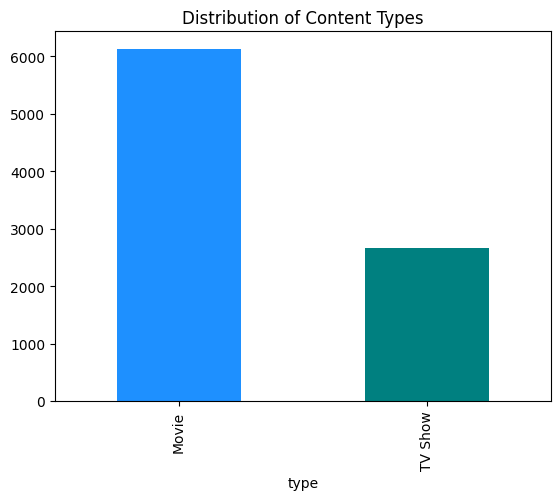

In [37]:
df['type'].value_counts().plot(kind = 'bar', title='Distribution of Content Types', color=['dodgerblue','teal'])

---

### Movies And Tv Shows Rating Frequency

In [15]:
ratings = df['rating'].value_counts().reset_index().sort_values(by = 'count', ascending = False)

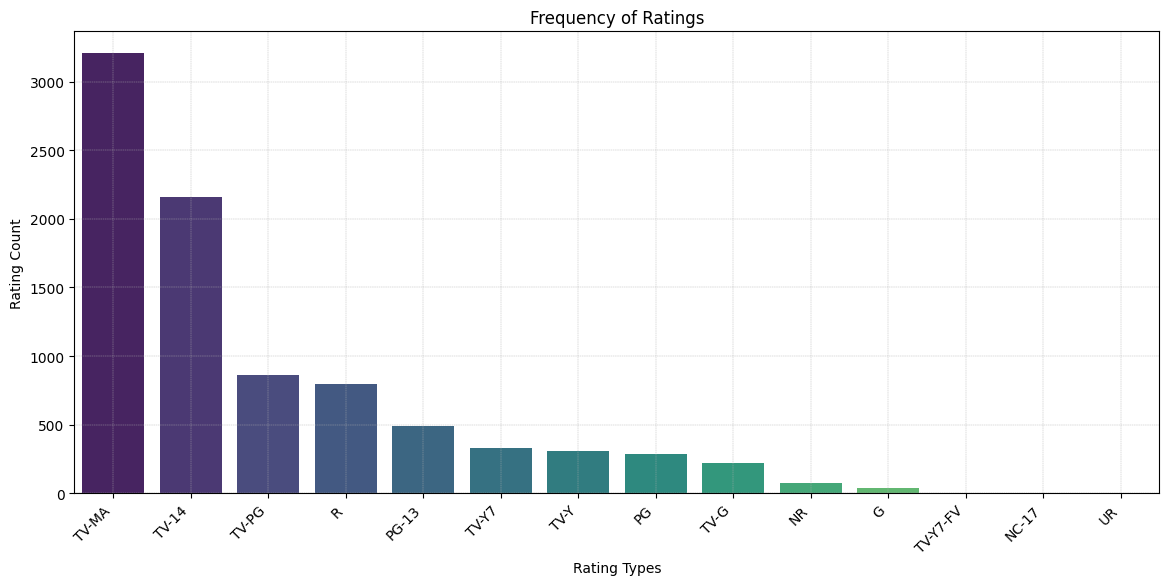

In [16]:
plt.figure(figsize = (14, 6))
sns.barplot(x = 'rating', y = 'count', data = ratings, hue = 'rating',  palette='viridis')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Rating Types')
plt.ylabel('Rating Count')
plt.title('Frequency of Ratings')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

---

### Top 10 Countries Producing Content

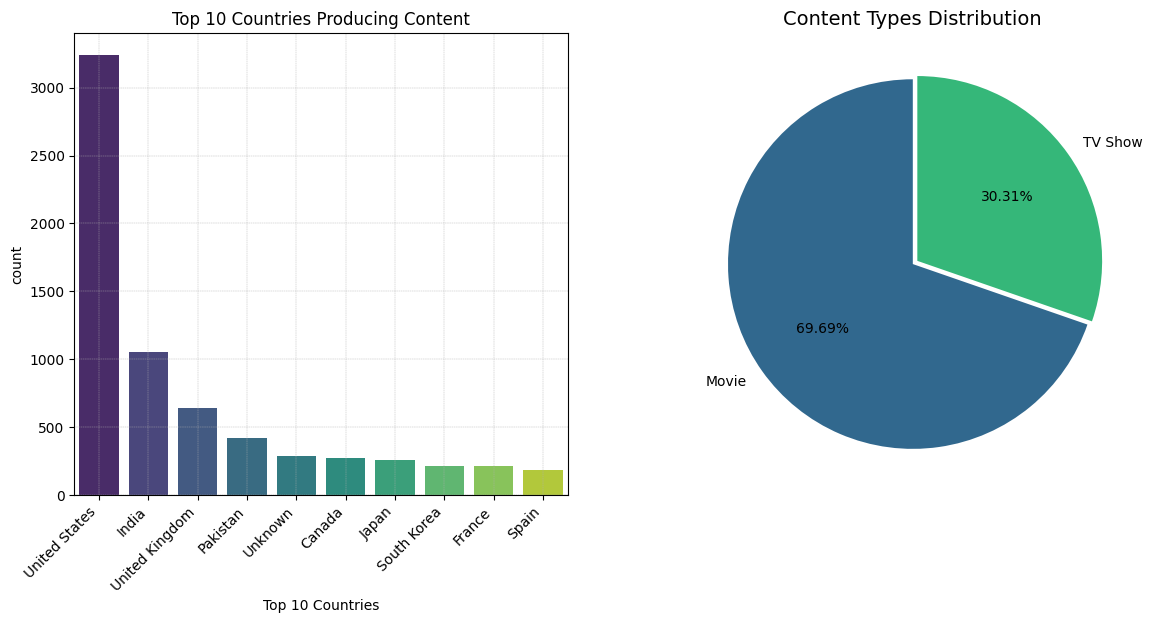

In [44]:
top_10_Countries = df['country'].value_counts().reset_index().sort_values(by = 'count', ascending = False)[:10]
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x = 'country', y = 'count', data = top_10_Countries,  palette='viridis')
plt.xlabel('Top 10 Countries')
plt.title('Top 10 Countries Producing Content')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)


# Pie Chart
plt.subplot(1, 2, 2)
type_counts = df['type'].value_counts()
type_counts.plot(kind='pie', autopct='%1.2f%%',explode=[0,0.03], startangle=90, colors=sns.color_palette('viridis', len(type_counts)))
plt.title('Content Types Distribution', fontsize=14)
plt.ylabel('')  # Removes y-axis label
plt.show()

##### As you can see for top 10 content distribution at 5th place 'Not Given' country also contributes which replaced with 'Unknown' 

---

### Top 10 Genres for Movies and Tv Shows

In [18]:
from collections import Counter

In [19]:
genres = ', '.join(df['listed_in']).split(', ')
genre_count = Counter(genres).most_common(10)
genre_df = pd.DataFrame(genre_count, columns = ['Genre', 'Count'])

In [20]:
genre_df.head(10)

,Genre,Count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,International TV Shows,1349
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,762
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


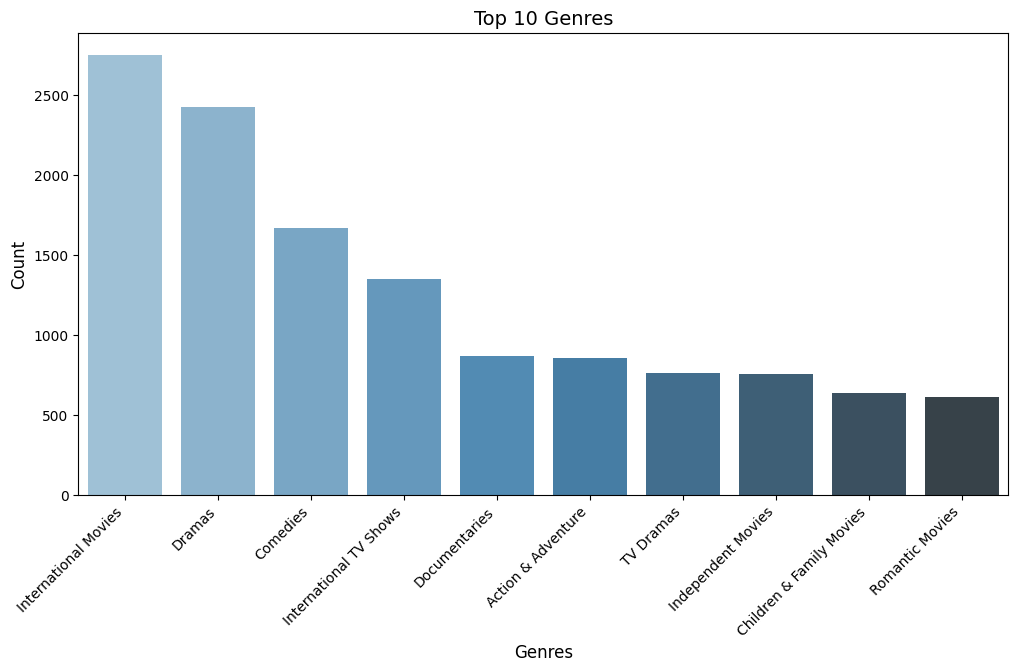

In [21]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Genre', y = 'Count', data = genre_df, hue=None, palette = 'Blues_d')
plt.title('Top 10 Genres', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

---

### Top 10 Directors by Content
creating pie chart to analyse 

In [22]:
top_10_directors = df['director'].value_counts().reset_index().sort_values(by = 'count', ascending = False)[1:10]

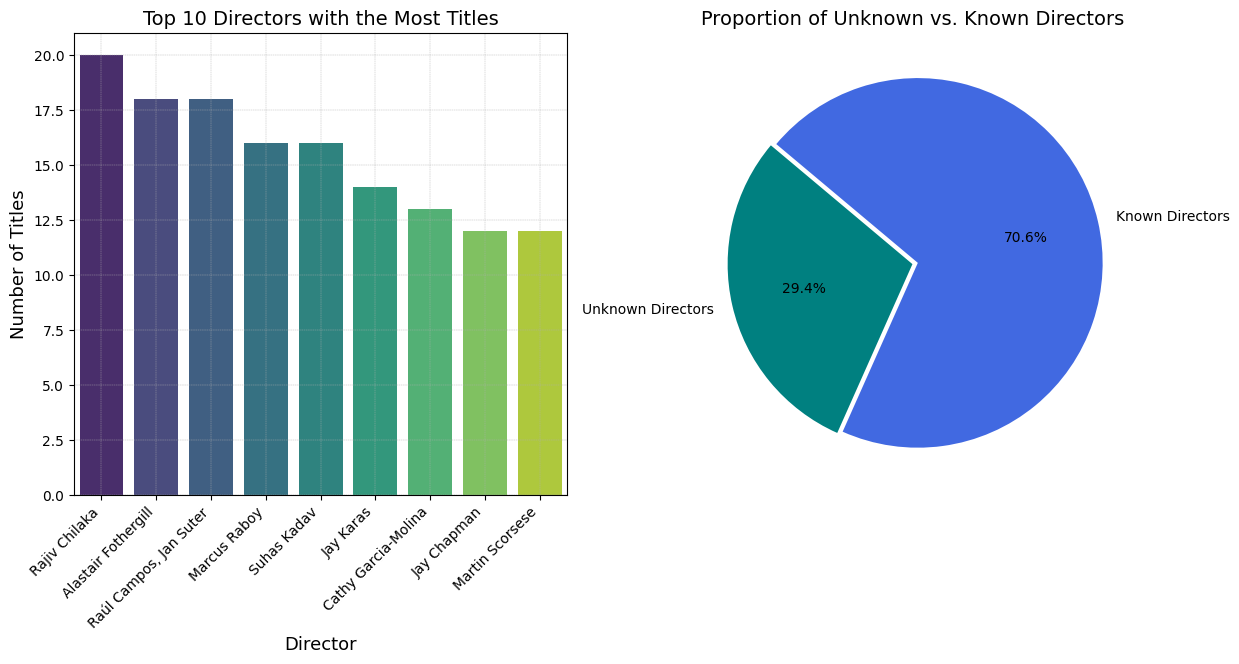

In [45]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.barplot(y='count', x='director', data=top_10_directors, palette='viridis')
plt.title('Top 10 Directors with the Most Titles', fontsize=14)
plt.ylabel('Number of Titles', fontsize=13)
plt.xlabel('Director', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

#dataset contains unknown director whose contributes heavily in the content bcoz of this a separate analysis to understand how many titles lack director information.
plt.subplot(1,2,2)
unknown_director = df[df['director'] == 'Unknown'].shape[0]
plt.pie([unknown_director, len(df) - unknown_director],
        labels=['Unknown Directors', 'Known Directors'],
        colors=['teal', 'royalblue'],
        autopct='%1.1f%%',
        explode=[0,0.03],
        startangle=140
       )
plt.title('Proportion of Unknown vs. Known Directors', fontsize=14)
plt.show()

29.4% of titles on Netflix do not have a listed director, which is a significant proportion of the dataset.
This suggests that a large number of movies and TV shows either do not credit a director or have missing metadata.

---

#### Year and month wise content added

In [24]:
#extract month and year from date column in dataset
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

#### Monthly Movies and Tv shows released

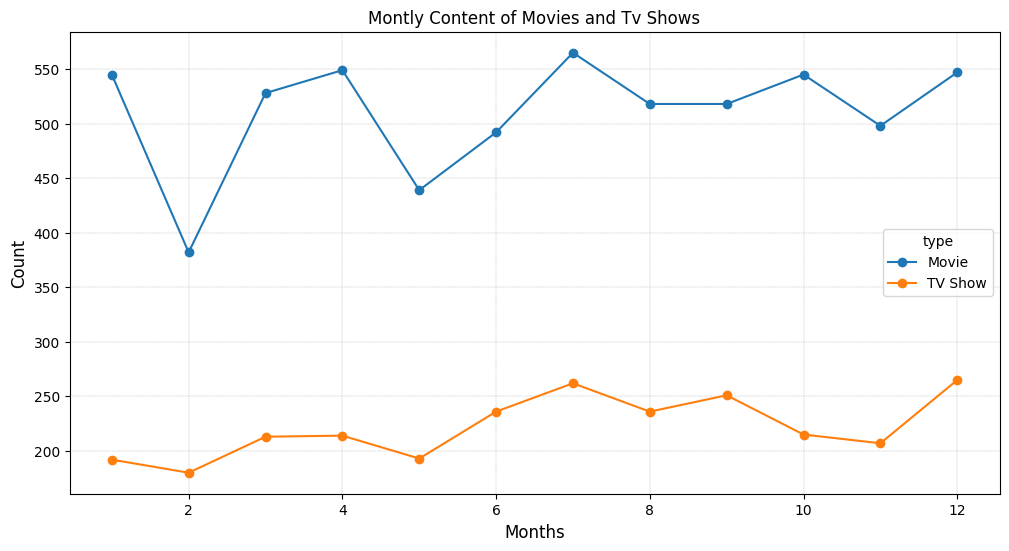

In [25]:
plt.figure(figsize = (12,6))
df.groupby(['month', 'type']).size().unstack().plot(kind = 'line', marker = 'o', ax = plt.gca())
plt.title('Montly Content of Movies and Tv Shows')
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

### Year-wise Content Added

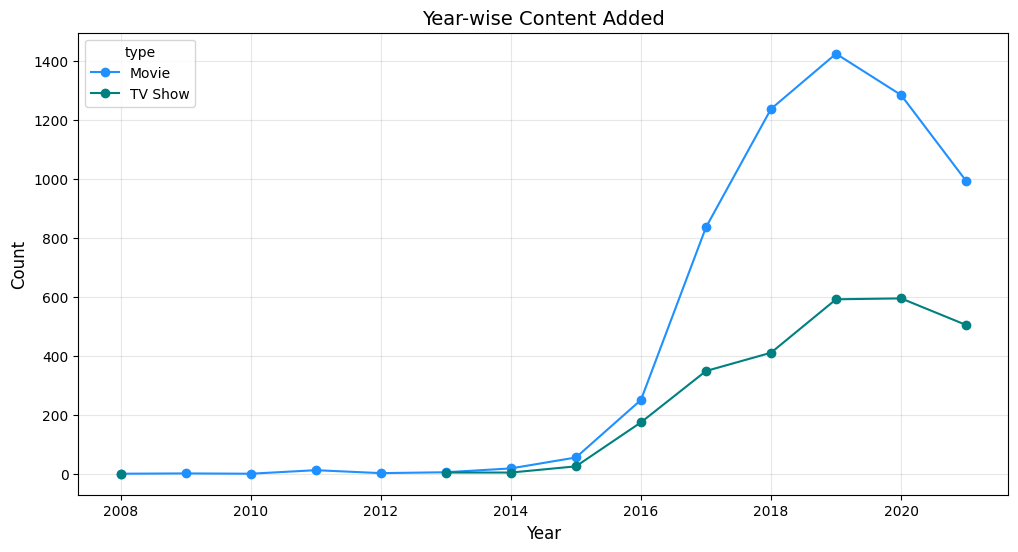

In [33]:
plt.figure(figsize = (12,6))
df.groupby(['year', 'type']).size().unstack().plot(kind = 'line', marker = 'o',  color=['dodgerblue','teal'], ax = plt.gca())
plt.title('Year-wise Content Added', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [27]:
from wordcloud import WordCloud

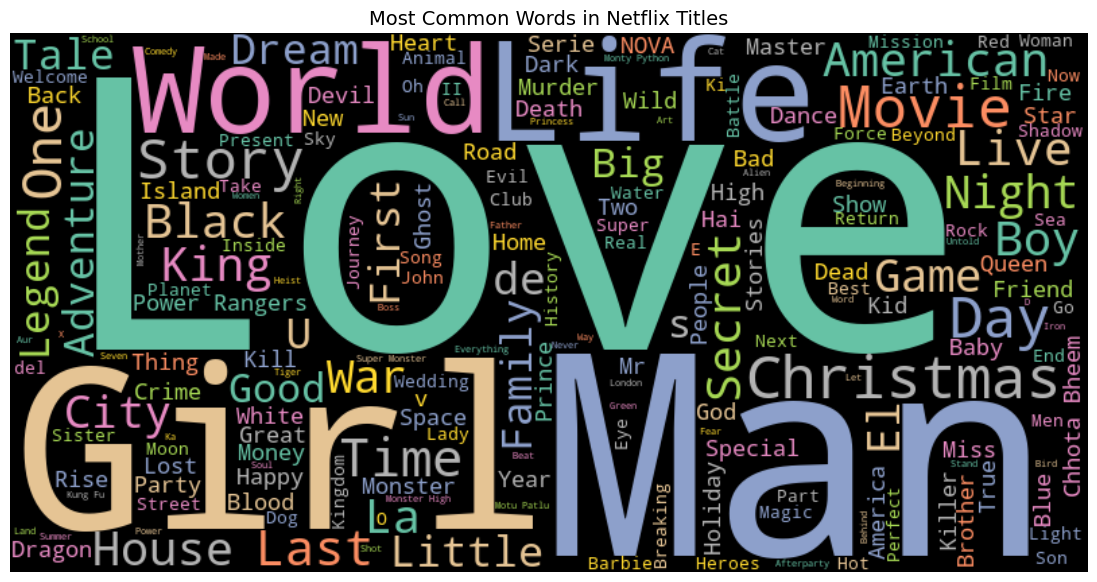

In [28]:
text = " ".join(title for title in df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', fontsize=14)
plt.show()


---

### 5. Conclusion and Insights
This analysis provided valuable insights into Netflix's content library. We examined the distribution of content types, genres, and directors, along with trends in content releases over time. These findings can help guide content acquisition and production strategies while identifying areas for growth and improvement.

### 📌*Key Insights from Netflix EDA :*

- Approximately 70% of the available content consists of movies, while TV shows make up the remaining 30%.
- The most frequent ratings are TV-MA (Mature Audiences) and TV-14, indicating that Netflix primarily focus on older teens and adults.
- TV-MA suggests a significant portion of content includes strong language, violence, or mature themes, making Netflix a popular platform for adult-oriented entertainment.
- Lower counts of TV-Y, TV-G, and PG-rated content suggest that family-friendly and children’s programming is less dominant.
This highlights an opportunity for expanding kid-friendly content to attract younger audiences.
- United states and India are the top-2 content producers
- The count of movies released each month is significantly higher than TV shows, with peaks in certain months suggesting planned series releases aligned with viewing trends, and a notable rise in both categories in the 12th month(December), likely due to holiday content strategies.
- There is a sharp increase in both movies and TV shows added from 2015 onward, indicating Netflix's aggressive expansion in content acquisition and production.
-Peak in 2019-2020: The highest number of movies and TV shows were added in 2019 and 2020, likely driven by increased demand for streaming content.